# This is a test file to identify lights spots in an SAA image and create smaller images of astronomical objects for classification

## Notebook shortcuts
site: http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html

- shift + enter
    - run cell, select below
- ctrl + enter
    - run cell
- option + enter
    - run cell, insert below
- A 
    - insert cell above
- B 
    - insert cell below
- C 
    - copy cell
- V
    - paste cell
- D , D 
    - delete selected cell
- shift + M 
    - merge selected cells, or current cell with cell below if only one cell selected
- I , I 
    - interrupt kernel
- 0 , 0 
    - restart kernel (with dialog)
- Y 
    - change cell to code mode
- M 
    - change cell to markdown mode (good for documentation)


## Imports

In [42]:
%matplotlib inline
# ^ necessary for in-line plots

import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt

## Load image and visualize

In [43]:
# check images in images folder
!ls 'SAA_images'

saa_img1.png


In [44]:
# load image from folder
img = cv2.imread('SAA_images/saa_img1.png')

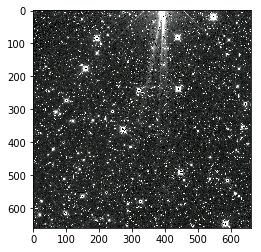

In [45]:
# using matplotlib instead of cv2 b/c it can display inline
plt.imshow(img, cmap='gray');

In [46]:
img_sm = img[0:40,0:40]

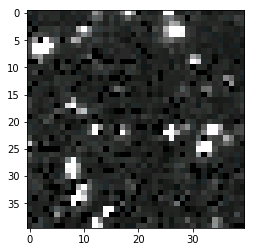

In [47]:
plt.imshow(img_sm, cmap='gray');

## Detect bright spots

https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

In [48]:
#imports
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2

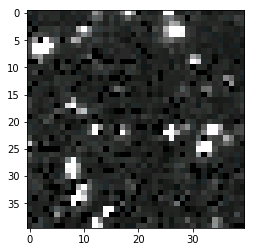

In [49]:
plt.imshow(img_sm, cmap='gray');

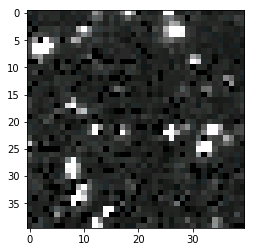

In [37]:
## TEST: SKIP THIS

# blur image

kernel_size = 3 # must be positive and odd

blurred_img = cv2.GaussianBlur(img_sm, (kernel_size,kernel_size), 0)

plt.imshow(blurred_img, cmap='gray');
plt.imshow(img_sm, cmap='gray');

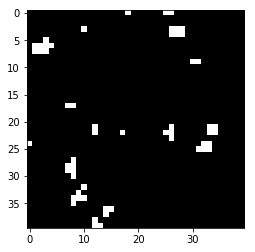

In [50]:
# apply light threshold to image
# this takes any pixel value >= 200 and sets it to 255 (white)

thresh = cv2.threshold(img_sm, 200, 255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh);

In [38]:
# perform a connected component analysis on the thresholded image

images = []
new_labels = []

# from scikit-image, labels blobs
labels = measure.label(thresh, neighbors=8, background=0)

# loop over the unique components
for label in np.unique(labels):
    # if it's a background label, ignore it
    if label == 0:
        continue
    
    # otherwise, construct label mask
    labelMask = np.zeros(thresh.shape, dtype = "uint8")
    
    labelMask[labels == label] = 255
    
    images.append(labelMask)
    new_labels.append(label)

In [51]:
thresh.shape

(40, 40, 3)

(40, 40)

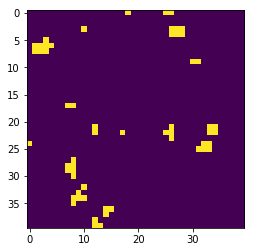

In [52]:
thresh_gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
plt.imshow(thresh_gray);
thresh_gray.shape

In [59]:
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh_gray, neighbors=8, background=0)
mask = np.zeros(thresh_gray.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(thresh_gray.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 
    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if numPixels > 0:
        mask = cv2.add(mask, labelMask)

In [62]:
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(img_sm, (int(cX), int(cY)), int(radius),
        (0, 0, 255), 3)
    cv2.putText(img_sm, "#{}".format(i + 1), (x, y - 15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

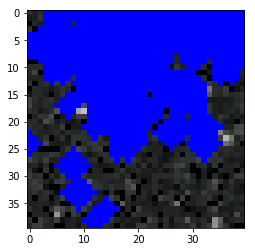

In [67]:
plt.imshow(img_sm);

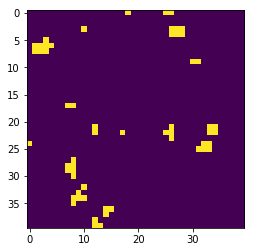

In [64]:
plt.imshow(thresh_gray);

In [70]:
contours,hierarchy = cv2.findContours(thresh_gray, 1, 2)
cnt = contours[1]
print(cnt)

[[[14 36]]

 [[14 37]]

 [[15 36]]]


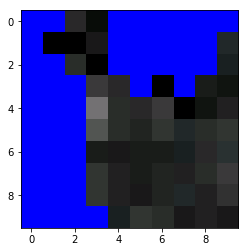

In [72]:
test_sm = img_sm[10:20, 30:40]
plt.imshow(test_sm, cmap='gray');